# Exploratory data analysis

### Module loading

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re

### Ideas

* Include a feature that captures if more people were in the cabin for instance

## Data loading

In [3]:
data = pd.read_csv("raw_data/train.csv")

In [16]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,parenthesis,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,NaN,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Florence Briggs Thayer,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,NaN,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Lily May Peel,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,NaN,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Montvila,NaN,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham,NaN,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston,NaN,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Behr,NaN,Mr


In [5]:
data.PassengerId = data.PassengerId.astype("category")
data.Pclass = data.Pclass.astype("category")

## Feature Engineering

In [6]:
# Extracting the family name
data["family_name"] = data.Name.apply(lambda x: re.findall("(.*),", x)[0])

In [15]:
# Extracting title
data["title"] = data.Name.apply(lambda x: re.findall("(\w*)\.", x)[0])

In [8]:
# Extracting text between parenthesis
parenthesis = data.Name.apply(lambda x: re.findall("\((.*)\)", x))
data["parenthesis"] = parenthesis.apply(lambda x: x[0] if x else np.nan)

In [19]:
# extracting the given name
given_name = data.Name.apply(lambda x: re.findall("\. (.+?)( \(|$)", x))
data["given_name"] = given_name.apply(lambda x: x[0][0] if x else np.nan)

In [20]:
# cuotes

cuotes = data.Name.apply(lambda x: re.findall('\"(.*)\"', x))
data["cuotes"] = cuotes.apply(lambda x: x[0] if x else np.nan)

### Name

## Feature analysis

### Passenger ID

In [28]:
data.PassengerId.describe()

count     891
unique    891
top       891
freq        1
Name: PassengerId, dtype: int64

In [26]:
# Check if all the passengerIds are unique
data["PassengerId"].value_counts().value_counts()

1    891
Name: PassengerId, dtype: int64

All passenger Ids are unique.

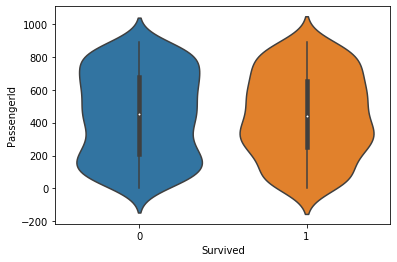

In [23]:
# Check if there is any relationship between survival and passenger IDs
sns.violinplot(x="Survived", y="PassengerId", data=data)
plt.show()

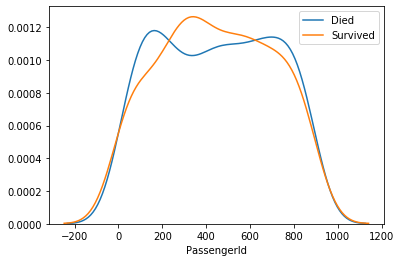

In [25]:
sns.distplot(data.PassengerId[data.Survived == 0], hist = False, label = "Died")
sns.distplot(data.PassengerId[data.Survived == 1], hist = False, label = "Survived")
plt.show()

In general it seems that there is no tendency relating passenger ID with survival

### Survived

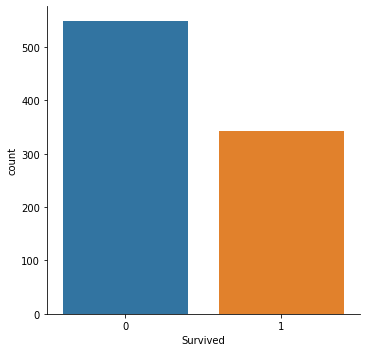

In [24]:
sns.catplot(x="Survived", kind="count", data=data)
plt.show()

### Pclass